# Objetivo del día
Aprender a:
- Definir y usar funciones.
- Manipular datos con **NumPy** y **Pandas**.
- Representar datos con **Matplotlib** y **Seaborn**.
- Trabajar con un ejemplo real: series temporales de temperaturas.

## 1. Funciones en Python

Las **funciones** permiten agrupar instrucciones bajo un nombre.  
- Se **definen** con la palabra clave `def`.  
- Pueden recibir **argumentos** de entrada.  
- Pueden devolver un **valor de salida** con `return`.  

### Ventajas:
- Reutilización de código.
- Programas más legibles y organizados.
- Permite dividir problemas grandes en partes pequeñas.

In [6]:
def saludar():
    print("Hola, bienvenidos al curso de Python")
    
saludar()

Hola, bienvenidos al curso de Python


In [13]:
def fahrenheit_a_celsius(f):
    """Función que calcula los grados celsius, 
    cuando introducimos grados fahrenheit"""
    return (f - 32) * 5/9

print(fahrenheit_a_celsius(100))  # 37.77

37.77777777777778


In [14]:
help(fahrenheit_a_celsius)

Help on function fahrenheit_a_celsius in module __main__:

fahrenheit_a_celsius(f)
    Función que calcula los grados celsius,
    cuando introducimos grados fahrenheit



In [8]:
def media_temperaturas(temp_dias):
    return sum(temp_dias) / len(temp_dias)

temps = [29, 31, 33, 27, 25, 34, 36]
print("Media semanal:", media_temperaturas(temps))

Media semanal: 30.714285714285715


In [9]:
def clasificar_temp(temp, umbral=30):
    if temp > umbral:
        return "Ola de calor"
    else:
        return "Normal"

print(clasificar_temp(28))         # Normal
print(clasificar_temp(32))         # Ola de calor
print(clasificar_temp(22, umbral=20)) # Ola de calor

Normal
Ola de calor
Ola de calor


In [10]:
def estadisticas(temp_dias):
    return min(temp_dias), max(temp_dias), sum(temp_dias)/len(temp_dias)

minimo, maximo, media = estadisticas(temps)
print("Mínimo:", minimo, "Máximo:", maximo, "Media:", media)

Mínimo: 25 Máximo: 36 Media: 30.714285714285715


### 🟢 Ejercicio fácil: Contar días de ola de calor

Dada una lista de temperaturas, escribe una **función** que cuente cuántos días superan los 30 °C.

Ejemplo:
```python
temps = [29, 31, 33, 27, 35, 36, 34, 28]

In [12]:
def contar_olas(temps, umbral=30):
    dias = 0
    for t in temps:
        if t > umbral:
            dias += 1
    return dias

temps = [29, 31, 33, 27, 35, 36, 34, 28]
print("Número de días con ola de calor:", contar_olas(temps))

Número de días con ola de calor: 5


### 📝 Ejercicio reto: Racha más larga de ola de calor

Dada una lista de temperaturas diarias, escribe una **función** que encuentre:

1. La racha más larga de días consecutivos con temperatura > 30°C.  
2. El número de días de esa racha.  

Ejemplo:  
```python
temps = [29, 31, 33, 27, 35, 36, 34, 28]

Resultado esperado Racha más larga: 3 días (35, 36, 34)

In [11]:
def racha_ola_calor(temps, umbral=30):
    racha_actual = 0
    racha_max = 0
    inicio_max = 0

    inicio_actual = 0
    for i, t in enumerate(temps):
        if t > umbral:
            if racha_actual == 0:
                inicio_actual = i
            racha_actual += 1
            if racha_actual > racha_max:
                racha_max = racha_actual
                inicio_max = inicio_actual
        else:
            racha_actual = 0
    
    return racha_max, temps[inicio_max:inicio_max+racha_max]

# Ejemplo de uso
temps = [29, 31, 33, 27, 35, 36, 34, 28]
dias, valores = racha_ola_calor(temps)
print(f"Racha más larga: {dias} días {valores}")

Racha más larga: 3 días [35, 36, 34]


## 🌍 Ejemplos de funciones útiles en Geofísica/Meteo


1. Convertir grados a radianes (y viceversa)

Muchos cálculos en sismología o dinámica atmosférica usan trigonometría.

In [15]:
import math

def grados_a_radianes(angulo):
    return angulo * math.pi / 180

def radianes_a_grados(angulo):
    return angulo * 180 / math.pi

2. Distancia aproximada entre dos puntos en la Tierra (fórmula de Haversine)

### Fórmula de Haversine

Para calcular la distancia \(d\) entre dos puntos de la superficie terrestre, dados por sus **latitudes** y **longitudes**:

1. Definimos primero las diferencias en latitud y longitud:

$$
\Delta \varphi = \varphi_2 - \varphi_1
\qquad
\Delta \lambda = \lambda_2 - \lambda_1
$$

donde:
- $(\varphi_1, \varphi_2)$ son las latitudes (en radianes).
- $(\lambda_1, \lambda_2)$ son las longitudes (en radianes).

---

2. Aplicamos la fórmula de Haversine:

$$
a = \sin^2\!\left(\tfrac{\Delta \varphi}{2}\right) +
    \cos(\varphi_1)\cos(\varphi_2)\sin^2\!\left(\tfrac{\Delta \lambda}{2}\right)
$$

---

3. Finalmente, la distancia entre los dos puntos es:

$$
d = 2R \, \arcsin(\sqrt{a})
$$

donde \(R\) es el radio medio de la Tierra ( $R \approx 6371 \, \text{km}$ ).   


In [16]:
import math

def distancia_haversine(lat1, lon1, lat2, lon2):
    R = 6371  # radio medio de la Tierra en km
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat/2)**2 + math.cos(lat1)*math.cos(lat2)*math.sin(dlon/2)**2
    c = 2 * math.asin(math.sqrt(a))
    return R * c

# Ejemplo: distancia Madrid–Granada
print(distancia_haversine(40.4, -3.7, 37.2, -3.6), "km")

355.9291943074949 km


🔹 Coordenadas aproximadas

- Isla Decepción (Shetland del Sur, Antártida):
	- lat = -62.97, lon = -60.67
- Madrid (España):
	- lat = 40.42, lon = -3.70

In [17]:
# Coordenadas
lat_deception, lon_deception = -62.97, -60.67
lat_madrid, lon_madrid = 40.42, -3.70

distancia = distancia_haversine(lat_deception, lon_deception, lat_madrid, lon_madrid)
print(f"Distancia Decepción → Madrid: {distancia:.0f} km")

Distancia Decepción → Madrid: 12553 km


3. Magnitud sísmica de Richter (simplificada)

Una versión educativa que relaciona amplitud de onda y distancia epicentral.

In [18]:
import math

def magnitud_richter(amplitud_mm, distancia_km):
    return math.log10(amplitud_mm) + 3 * math.log10(8 * distancia_km) - 2.92

print(magnitud_richter(20, 100))  # Ejemplo

7.090299956639813


4. Índice de calor (heat index)

En meteorología se usa para estimar la “sensación térmica” combinando temperatura y humedad relativa.

In [19]:
def indice_calor(temp_c, humedad):
    T = temp_c * 9/5 + 32  # convertir a °F
    R = humedad
    HI = (-42.379 + 2.04901523*T + 10.14333127*R
          - 0.22475541*T*R - 0.00683783*T**2
          - 0.05481717*R**2 + 0.00122874*T**2*R
          + 0.00085282*T*R**2 - 0.00000199*T**2*R**2)
    return (HI - 32) * 5/9  # devolver en °C

print(indice_calor(32, 70))  # Ejemplo: 32°C con 70% HR

40.40927367955577


## 2. NumPy
- Biblioteca fundamental para el cálculo numérico.
- Introduce los **arrays** (matrices) → más eficientes que las listas.
- Permite operaciones vectorizadas (más rápidas y expresivas).

### arrays

Los "arrays" no son matrices en sentido estricto sino vectores de cualquier dimensión. Si multiplicamos 2 arrays de dimensión 2, no hace el producto matricial sino que multiplica los arrays elemento a elemento. Hay que usar las funciones específicas para el producto matricial o definir el objeto como clase "matrix" (que es un tipo especial de "array" que tiene implementados los métodos de las matrices matemáticas)

In [20]:
import numpy as np

# Crear arrays
a = np.array([1, 2, 3, 4])
b = np.array([10, 20, 30, 40])

# Operaciones vectorizadas
print(a + b)    # [11 22 33 44]
print(a * 2)    # [2 4 6 8]
print(a.mean()) # 2.5

[11 22 33 44]
[2 4 6 8]
2.5


## NumPy: `linspace` y `logspace`

- `np.linspace(inicio, fin, num)`  
  Genera `num` valores **equitativamente espaciados** entre `inicio` y `fin`.  

- `np.logspace(inicio, fin, num, base=10)`  
  Genera `num` valores **espaciados logarítmicamente** entre `base**inicio` y `base**fin`.  

Muy útiles en meteorología y geofísica para generar:
- Escalas de tiempo, frecuencias, profundidades o radios.
- Ejemplos de perfiles o espectros.

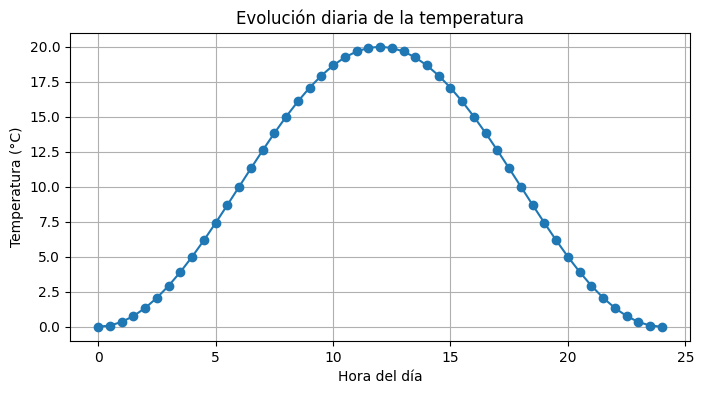

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# 24 horas del día en pasos de 30 min
horas = np.linspace(0, 24, 49)  # 49 valores de 0 a 24

# Modelo sintético de temperatura (mínimo de noche, máximo a mediodía)
T = 10 + 10 * np.sin((horas-6) * np.pi / 12)

plt.figure(figsize=(8,4))
plt.plot(horas, T, marker="o")
plt.xlabel("Hora del día")
plt.ylabel("Temperatura (°C)")
plt.title("Evolución diaria de la temperatura")
plt.grid()
plt.show()

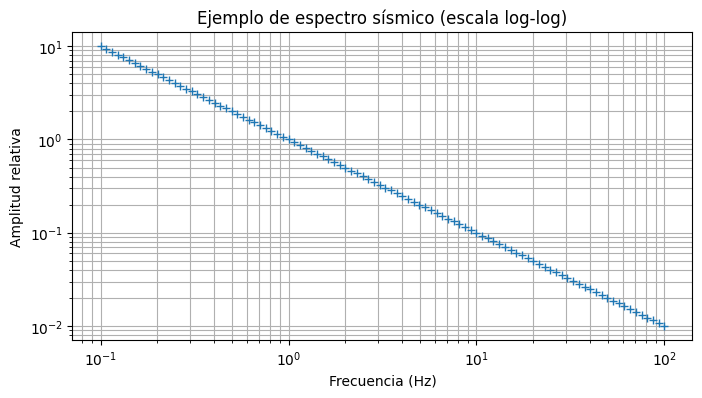

In [39]:
# Frecuencias entre 0.1 y 100 Hz, en escala logarítmica
f = np.logspace(-1, 2, 100)  # de 10^-1 a 10^2

# Modelo de atenuación espectral (disminuye con la frecuencia)
amplitud = 1 / f

plt.figure(figsize=(8,4))
plt.loglog(f, amplitud, '+')
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud relativa")
plt.title("Ejemplo de espectro sísmico (escala log-log)")
plt.grid(which="both")
plt.show()

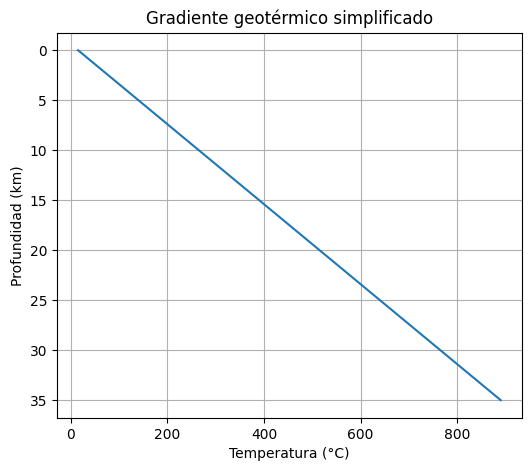

In [40]:
# Profundidades de 0 a 35 km (corteza continental típica)
z = np.linspace(0, 35, 50)

# Modelo de gradiente térmico (°C/km)
T = 15 + 25 * z  # 25 °C/km

plt.figure(figsize=(6,5))
plt.plot(T, z)
plt.gca().invert_yaxis()  # profundidad hacia abajo
plt.xlabel("Temperatura (°C)")
plt.ylabel("Profundidad (km)")
plt.title("Gradiente geotérmico simplificado")
plt.grid()
plt.show()

### 📊 Comparativa: `arange` vs `linspace` vs `logspace`

| Función | Uso principal | Argumentos clave | Ejemplo | Resultado |
|---------|--------------|------------------|---------|-----------|
| `np.arange(inicio, fin, paso)` | Secuencias con **paso fijo** | inicio, fin, paso | `np.arange(0, 10, 2)` | [0, 2, 4, 6, 8] |
| `np.linspace(inicio, fin, num)` | Secuencias con **nº de puntos fijos, equiespaciados** | inicio, fin, num | `np.linspace(0, 10, 5)` | [0, 2.5, 5, 7.5, 10] |
| `np.logspace(inicio, fin, num, base=10)` | Secuencias con **espaciado logarítmico** | inicio, fin, num, base | `np.logspace(0, 2, 5)` | [1, 3.16, 10, 31.6, 100] |

---

✅ **Regla rápida**:
- Usa `arange` cuando conozcas el **paso**.  
- Usa `linspace` cuando quieras un número fijo de **puntos equidistantes**.  
- Usa `logspace` para escalas que varían en varios órdenes de magnitud (frecuencias, energía, radios).  

### 📝 Mini ejercicios con `arange`, `linspace` y `logspace`

1. **`np.arange` – Horas del día**  
   Crea un array con las horas de un día en pasos de 6 horas:  

2. **`np.linspace` – Perfil en profundidad**  
Genera 20 puntos equiespaciados desde la superficie (0 km) hasta 100 km de profundidad.

3. **`np.logspace` – Frecuencias sísmicas**  
Genera 10 valores de frecuencia entre $(10^{-2})$ Hz y $(10^{2})$ Hz en escala logarítmica.

In [52]:
import numpy as np

# 1. Horas del día (cada 6 h)
horas = np.arange(0, 24, 6)
print("Horas:", horas)

# 2. Perfil en profundidad (20 puntos de 0 a 100 km)
profundidad = np.linspace(0, 100, 20)
print("Profundidades (km):", profundidad)

# 3. Frecuencias sísmicas (10^-2 a 10^2 Hz)
frecuencias = np.logspace(-2, 2, 10)
print("Frecuencias (Hz):", frecuencias)

Horas: [ 0  6 12 18]
Profundidades (km): [  0.           5.26315789  10.52631579  15.78947368  21.05263158
  26.31578947  31.57894737  36.84210526  42.10526316  47.36842105
  52.63157895  57.89473684  63.15789474  68.42105263  73.68421053
  78.94736842  84.21052632  89.47368421  94.73684211 100.        ]
Frecuencias (Hz): [1.00000000e-02 2.78255940e-02 7.74263683e-02 2.15443469e-01
 5.99484250e-01 1.66810054e+00 4.64158883e+00 1.29154967e+01
 3.59381366e+01 1.00000000e+02]


### Pandas
- Trabaja con **Series** (vectores con etiquetas) y **DataFrames** (tablas).
- Permite leer y escribir datos de CSV, Excel, NetCDF, etc.
- Muy usado en análisis meteorológico y geofísico.

In [26]:
import pandas as pd

# Leer CSV con temperaturas
df = pd.read_csv("data/temperaturas.csv", parse_dates=["fecha"])
print(df.head())

# Estadísticas básicas
print(df["T"].mean())
print(df.describe())

       fecha          T
0 2020-01-01  15.993428
1 2020-01-02  14.895605
2 2020-01-03  16.639593
3 2020-01-04  18.562256
4 2020-01-05  15.219718
14.97250650715462
                     fecha           T
count                  731  731.000000
mean   2020-12-31 00:00:00   14.972507
min    2020-01-01 00:00:00   -1.278672
25%    2020-07-01 12:00:00    8.451909
50%    2020-12-31 00:00:00   15.178967
75%    2021-07-01 12:00:00   21.439251
max    2021-12-31 00:00:00   30.465001
std                    NaN    7.268663


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   fecha   731 non-null    datetime64[ns]
 1   T       731 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.6 KB


le estamos diciendo a pandas:
- Convierte automáticamente la columna "fecha" a objetos datetime64 (tipo fecha de pandas).
- Esto te permite usar todas las funciones de manejo de fechas en pandas: .dt.year, .dt.month, .dt.day, agrupaciones por mes, resampling, etc.

In [28]:
df["mes"] = df["fecha"].dt.month
print(df)

         fecha          T  mes
0   2020-01-01  15.993428    1
1   2020-01-02  14.895605    1
2   2020-01-03  16.639593    1
3   2020-01-04  18.562256    1
4   2020-01-05  15.219718    1
..         ...        ...  ...
726 2021-12-27  14.348844   12
727 2021-12-28  15.178967   12
728 2021-12-29  13.576265   12
729 2021-12-30  13.271257   12
730 2021-12-31  15.391691   12

[731 rows x 3 columns]


### 🗓️ Chuleta de fechas en Pandas (`.dt`)

Si una columna está en formato `datetime64` (usando `parse_dates`), podemos acceder a sus partes con `.dt`:

- `.dt.year` → Año  
- `.dt.month` → Mes (número 1–12)  
- `.dt.month_name()` → Nombre del mes  
- `.dt.day` → Día del mes  
- `.dt.dayofweek` → Día de la semana (0=lunes, 6=domingo)  
- `.dt.day_name()` → Nombre del día de la semana  
- `.dt.hour`, `.dt.minute`, `.dt.second` → Hora, minuto, segundo  
- `.dt.date` → Solo la fecha (sin hora)  
- `.dt.strftime("%Y-%m-%d")` → Formato personalizado (ej. "2020-01-31")  

### 🔹 Ejemplo
```python
df["año"] = df["fecha"].dt.year
df["mes"] = df["fecha"].dt.month
df["mes_nombre"] = df["fecha"].dt.month_name()
df["dia_semana"] = df["fecha"].dt.day_name()

## 3. Visualización de datos en Python

La visualización es una herramienta fundamental en Meteorología y Geofísica:  
- Permite **explorar** los datos.  
- Facilita la **comunicación de resultados**.  
- Ayuda a **detectar patrones y anomalías**.

### Bibliotecas principales
- **Matplotlib**
  - La librería base de visualización en Python.
  - Muy flexible: permite gráficos de líneas, dispersión, histogramas, mapas de calor, etc.
- **Seaborn**
  - Construida sobre Matplotlib.
  - Ofrece una interfaz más sencilla y gráficos con estilos mejorados.
- **Cartopy**
  - Especializada en mapas y proyecciones geográficas.
  - Muy usada en Meteorología y Geociencias.

### Ejemplos de lo que haremos hoy
- Graficar una **serie temporal** de temperaturas.
- Representar una **climatología mensual**.
- Hacer **histogramas** y **diagramas de dispersión**.
- Crear un **mapa simple de estaciones meteorológicas**.

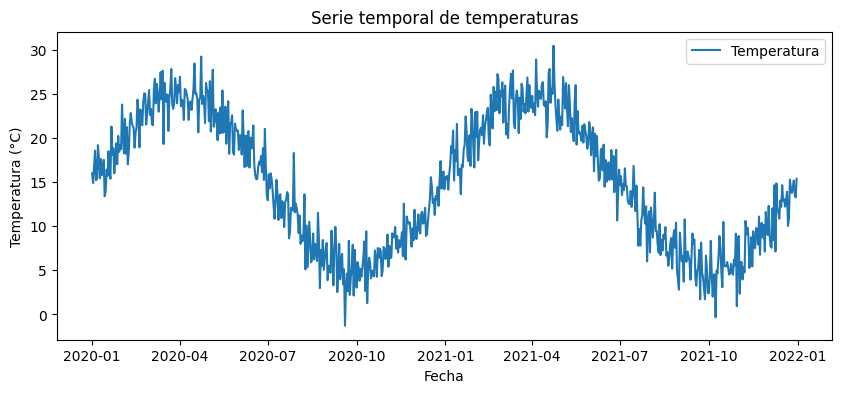

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Serie temporal
plt.figure(figsize=(10,4))
plt.plot(df["fecha"], df["T"], label="Temperatura")
plt.xlabel("Fecha")
plt.ylabel("Temperatura (°C)")
plt.title("Serie temporal de temperaturas")
plt.legend()
plt.show()


### Ejercicios
1. Leer un archivo CSV con temperaturas diarias (columna: `fecha`, `T`).  
2. Calcular la **media mensual** y graficar la climatología.  
3. Calcular la **media anual**.  
4. Representar en un mapa (lat, lon, T) las temperaturas de varias estaciones.

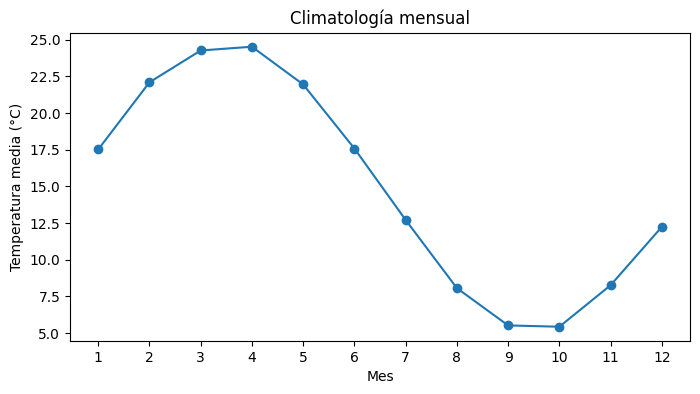

In [55]:
# Añadir columna de mes
df["mes"] = df["fecha"].dt.month

# Calcular climatología mensual
clim = df.groupby("mes")["T"].mean()

plt.figure(figsize=(8,4))
clim.plot(marker="o")
plt.xticks(range(1,13))
plt.xlabel("Mes")
plt.ylabel("Temperatura media (°C)")
plt.title("Climatología mensual")
plt.show()

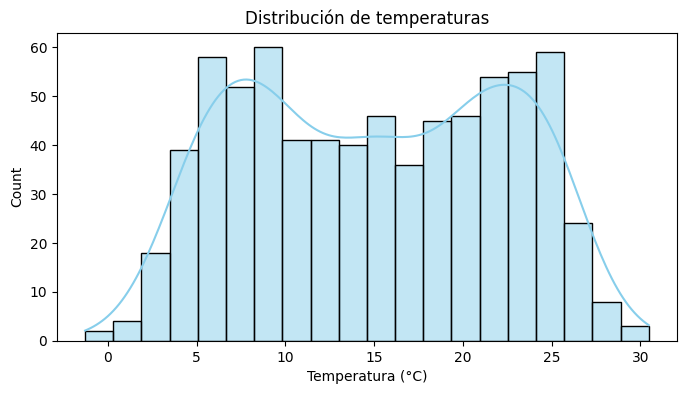

In [56]:
import seaborn as sns

plt.figure(figsize=(8,4))
sns.histplot(df["T"], bins=20, kde=True, color="skyblue")
plt.xlabel("Temperatura (°C)")
plt.title("Distribución de temperaturas")
plt.show()

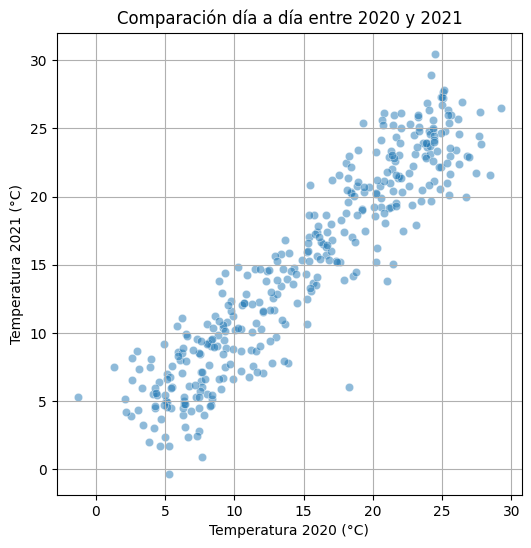

In [57]:
# Ejemplo: comparar temperaturas de dos años
df["año"] = df["fecha"].dt.year
df_2020 = df[df["año"] == 2020].reset_index(drop=True)
df_2021 = df[df["año"] == 2021].reset_index(drop=True)

plt.figure(figsize=(6,6))
sns.scatterplot(x=df_2020["T"], y=df_2021["T"], alpha=0.5)
plt.xlabel("Temperatura 2020 (°C)")
plt.ylabel("Temperatura 2021 (°C)")
plt.title("Comparación día a día entre 2020 y 2021")
plt.grid()
plt.show()

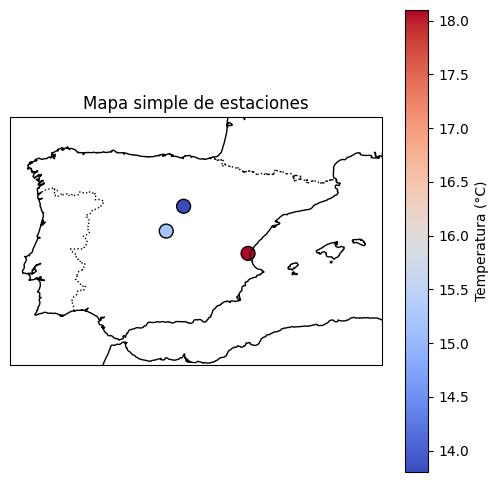

In [31]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Supongamos un DataFrame con estaciones
estaciones = pd.DataFrame({
    "lat": [40.4, 41.4, 39.5],
    "lon": [-3.7, -3.0, -0.4],
    "T": [15.2, 13.8, 18.1]
})

fig, ax = plt.subplots(figsize=(6,6), subplot_kw={"projection": ccrs.PlateCarree()})
ax.set_extent([-10, 5, 35, 45])
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=":")

sc = ax.scatter(estaciones["lon"], estaciones["lat"], 
                c=estaciones["T"], cmap="coolwarm", s=100, edgecolor="k")

plt.colorbar(sc, label="Temperatura (°C)")
plt.title("Mapa simple de estaciones")
plt.show()

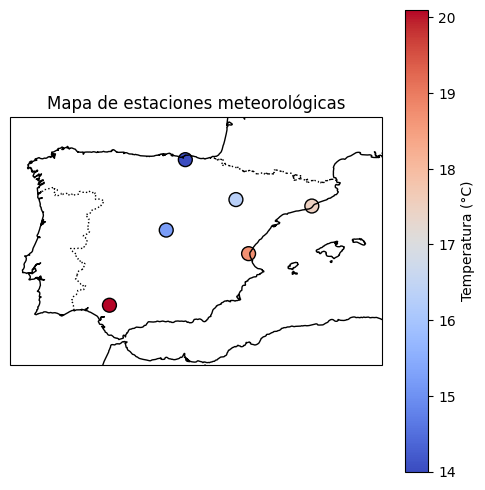

In [59]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Dataset estaciones.csv
estaciones = pd.read_csv("data/estaciones.csv")

fig, ax = plt.subplots(figsize=(6,6), subplot_kw={"projection": ccrs.PlateCarree()})
ax.set_extent([-10, 5, 35, 45])
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=":")

sc = ax.scatter(estaciones["lon"], estaciones["lat"], 
                c=estaciones["T"], cmap="coolwarm", s=100, edgecolor="k")

plt.colorbar(sc, label="Temperatura (°C)")
plt.title("Mapa de estaciones meteorológicas")
plt.show()

### 📝 Ejercicio de cierre del Día 2

Con el dataset `temperaturas.csv`:

1. Añade columnas de **año** y **mes** a la tabla.  
2. Calcula la **temperatura media mensual para cada año**.  
3. Representa en un gráfico las climatologías mensuales de 2020 y 2021.  
   - Eje X → meses (1–12).  
   - Eje Y → temperatura media (°C).  
   - Una línea por cada año.  

**Objetivo**: comparar cómo varía la climatología de un año a otro.

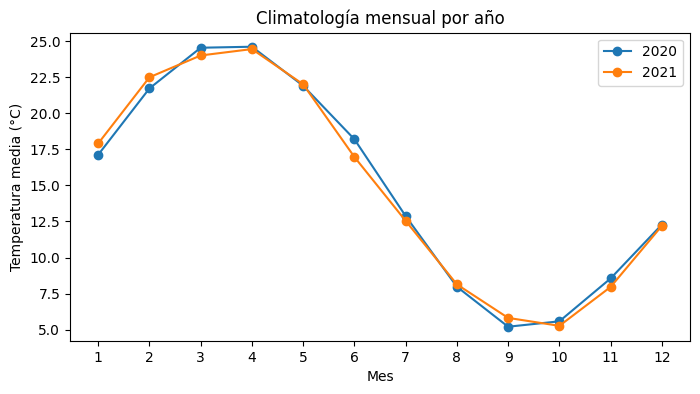

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

# Leer dataset
df = pd.read_csv("data/temperaturas.csv", parse_dates=["fecha"])

# Añadir columnas de año y mes
df["año"] = df["fecha"].dt.year
df["mes"] = df["fecha"].dt.month

# Calcular media mensual por año
clim_anual = df.groupby(["año", "mes"])["T"].mean().reset_index()

# Graficar
plt.figure(figsize=(8,4))
for año in clim_anual["año"].unique():
    subset = clim_anual[clim_anual["año"] == año]
    plt.plot(subset["mes"], subset["T"], marker="o", label=str(año))

plt.xticks(range(1,13))
plt.xlabel("Mes")
plt.ylabel("Temperatura media (°C)")
plt.title("Climatología mensual por año")
plt.legend()
plt.show()

### 📝 Ejercicio de cierre (versión con Seaborn)

Podemos obtener el mismo resultado con `seaborn.lineplot`, que simplifica la creación de gráficos cuando trabajamos con DataFrames:

- Eje X → `mes`  
- Eje Y → `T` (temperatura)  
- Color → `año`  

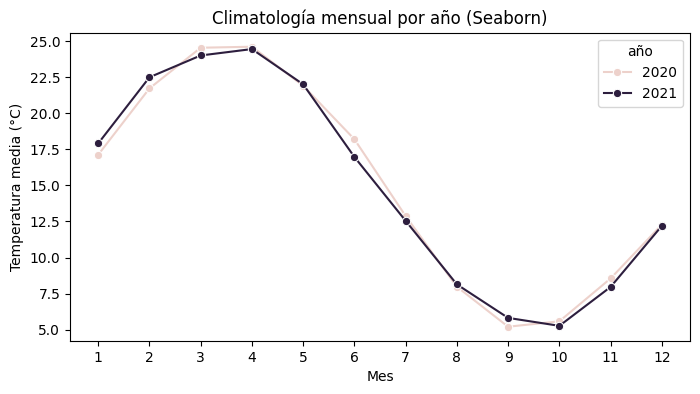

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Graficar climatología mensual por año
plt.figure(figsize=(8,4))
sns.lineplot(data=clim_anual, x="mes", y="T", hue="año", marker="o")

plt.xticks(range(1,13))
plt.xlabel("Mes")
plt.ylabel("Temperatura media (°C)")
plt.title("Climatología mensual por año (Seaborn)")
plt.show()

### 🗺️ Ejercicio extra: Mapa de estaciones meteorológicas

Con el dataset `estaciones.csv`:

1. Carga las estaciones con Pandas.  
2. Representa en un **mapa simple** la localización de las estaciones (lat, lon).  
3. Colorea cada estación según su temperatura media.  
4. Añade un **colorbar** con la escala de temperatura.  

**Objetivo**: practicar cómo visualizar datos espaciales en un mapa.

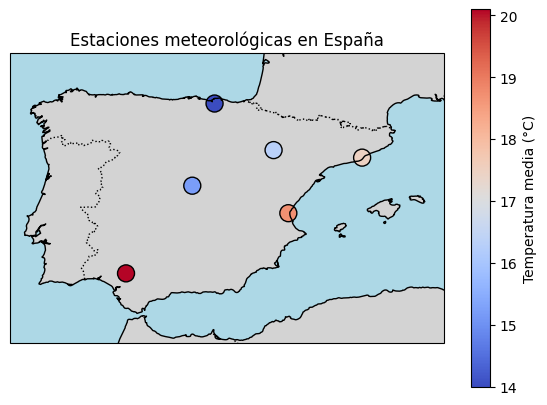

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Leer dataset
estaciones = pd.read_csv("data/estaciones.csv")

# Crear mapa
fig, ax = plt.subplots(figsize=(7,7), subplot_kw={"projection": ccrs.PlateCarree()})
ax.set_extent([-10, 5, 35, 45])  # España y alrededores
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.add_feature(cfeature.LAND, facecolor="lightgray")
ax.add_feature(cfeature.OCEAN, facecolor="lightblue")

# Representar estaciones
sc = ax.scatter(estaciones["lon"], estaciones["lat"], 
                c=estaciones["T"], cmap="coolwarm", s=150, edgecolor="k")

# Añadir colorbar
cbar = plt.colorbar(sc, ax=ax, orientation="vertical", shrink=0.7)
cbar.set_label("Temperatura media (°C)")

plt.title("Estaciones meteorológicas en España")
plt.show()